In [73]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.feature_selection import RFE
import statsmodels.formula.api as sm

In [5]:
df = pd.read_csv('D:/DS/analytics_edge/framingham.csv')

### Summary Statistics

In [7]:
pandas_profiling.ProfileReport(df)

Number of variables,16
Number of observations,4240
Total Missing (%),1.0%
Total size in memory,530.1 KiB
Average record size in memory,128.0 B
Numeric,10
Categorical,0
Boolean,6
Date,0
Text (Unique),0
Rejected,0


In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [17]:
df.groupby('male').mean()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,49.795868,1.964105,0.408678,5.729730,0.037364,0.006198,0.308264,0.023554,239.441313,133.040083,82.296694,25.510723,77.097934,81.83605,0.124380
1,49.293407,2.000000,0.607692,13.368771,0.019391,0.005495,0.313736,0.028571,233.104799,131.443132,83.696978,26.185333,74.257284,82.12434,0.188462


In [18]:
df.groupby('currentSmoker').mean()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
currentSmoker,,,,,,,,,,,,,,,
0,0.332867,51.390210,1.960747,0.000000,0.037825,0.008392,0.358042,0.032634,238.741769,135.191142,84.168065,26.478289,75.134266,83.297146,0.144988
1,0.527924,47.726969,1.998534,18.356244,0.021236,0.003341,0.262053,0.018616,234.595930,129.450358,81.597136,25.108712,76.641834,80.579365,0.158950


### Visualizations

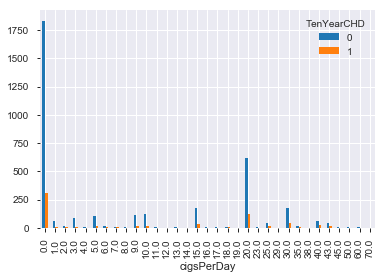

In [20]:
pd.crosstab(df.cigsPerDay, df.TenYearCHD).plot(kind='bar')

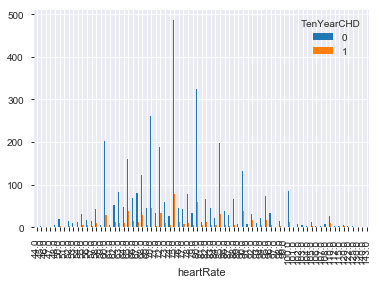

In [21]:
pd.crosstab(df.heartRate, df.TenYearCHD).plot(kind='bar')

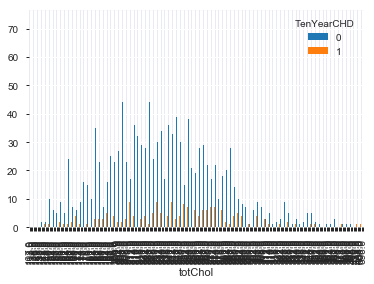

In [22]:
pd.crosstab(df.totChol, df.TenYearCHD).plot(kind='bar')

### Recursive Feature Elimination

In [46]:
# filling NaN vals with mean values of each column so the rfe and regression can work
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [47]:
df.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [48]:
y = pd.DataFrame(df['TenYearCHD'])
X = pd.DataFrame(df.drop(['TenYearCHD'], axis = 1))

In [49]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [51]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hence all the features are useful for fitting the logistic regression model.

In [53]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.396494
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3643
Method:                           MLE   Df Model:                           14
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:                 0.07063
Time:                        17:20:59   Log-Likelihood:                -1450.4
converged:                       True   LL-Null:                       -1560.6
                                        LLR p-value:                 3.572e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4015      0.105      3.834      0.000       0.196       0.607
age                 0.0289      0.006      4.949      0.000       0.017       0.040
education          -0.1973      0.048     -4.100      0.000      -0.292      -0.103
currentSmoker      -0.2111      0.153     -1.380      0.168      -0.511       0.089
cigsPerDay          0.0206      0.006      3.326      0.001       0.008       0.033
BPMeds              0.3657      0.230      1.587      0.113      -0.086       0.817
prevalentStroke     0.7057      0.485      1.456      0.146      -0.245       1.656
prevalentHyp        0.9162      0.124      7.365      0.000       0.672       1.160
diabetes            0.7305      0.298      2.452      0.014       0.147       1.314
totChol            -0.0010      0.001     -0.925      0.355      -0.003       0.001
sysBP               0.0127      0.004      3.345      0.001       0.005       0.020
diaBP              -0.0259      0.006     -4.232      0.000      -0.038      -0.014
BMI                -0.0483      0.012     -3.928      0.000      -0.072      -0.024
heartRate          -0.0224      0.004     -5.647      0.000      -0.030      -0.015
glucose             0.0020      0.002      0.967      0.334      -0.002       0.006
===================================================================================
"""

Eliminate the features with a P values greater than 0.05.

They are: 
* currentSmoker
* BPMeds
* prevalentStroke
* totChol
* glucose

In [59]:
X = pd.DataFrame(df.drop(['TenYearCHD', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'totChol', 'glucose' ], axis = 1))

In [60]:
X.head()

,male,age,education,cigsPerDay,prevalentHyp,diabetes,sysBP,diaBP,BMI,heartRate
0,1,39,4.0,0.0,0,0,106.0,70.0,26.97,80.0
1,0,46,2.0,0.0,0,0,121.0,81.0,28.73,95.0
2,1,48,1.0,20.0,0,0,127.5,80.0,25.34,75.0
3,0,61,3.0,30.0,1,0,150.0,95.0,28.58,65.0
4,0,46,3.0,23.0,0,0,130.0,84.0,23.10,85.0


In [61]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


In [62]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.397676
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3648
Method:                           MLE   Df Model:                            9
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:                 0.06785
Time:                        17:26:38   Log-Likelihood:                -1454.7
converged:                       True   LL-Null:                       -1560.6
                                        LLR p-value:                 1.114e-40
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
male             0.4034      0.104      3.889      0.000       0.200       0.607
age              0.0280      0.006      5.029      0.000       0.017       0.039
education       -0.2031      0.048     -4.270      0.000      -0.296      -0.110
cigsPerDay       0.0138      0.004      3.315      0.001       0.006       0.022
prevalentHyp     0.9581      0.121      7.931      0.000       0.721       1.195
diabetes         0.9244      0.231      4.007      0.000       0.472       1.377
sysBP            0.0133      0.004      3.550      0.000       0.006       0.021
diaBP           -0.0267      0.006     -4.383      0.000      -0.039      -0.015
BMI             -0.0477      0.012     -3.939      0.000      -0.071      -0.024
heartRate       -0.0237      0.004     -6.193      0.000      -0.031      -0.016
================================================================================
"""

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1000)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Evaluation

In [67]:
print('Accuracy of the logistic regression model: {:.2f} '.format(logreg.score(X_test, y_test)))

Accuracy of the logistic regression model: 0.85 


In [69]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1074    5]
 [ 191   11]]


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       0.69      0.05      0.10       202

   micro avg       0.85      0.85      0.85      1281
   macro avg       0.77      0.52      0.51      1281
weighted avg       0.82      0.85      0.79      1281



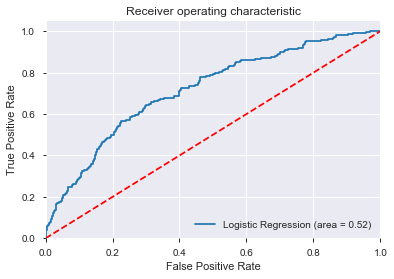

In [74]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")